In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
% matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

C:\Users\Michal_schudnij\AppData\Roaming\Python\Python36\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading data

In [107]:
df_warszawa = pd.read_csv("../datasets/preprocessed_data/df_warszawa.csv")
df_krakow = pd.read_csv("../datasets/preprocessed_data/df_krakow.csv")
df_poznan = pd.read_csv("../datasets/preprocessed_data/df_poznan.csv")

In [108]:
df = pd.concat([df_warszawa, df_krakow, df_poznan])
df = df.reset_index()
df = df.drop(columns = {'geometry', 'index'})
features = df.columns.to_list()
features.remove('grid_index')

In [109]:
df.head()

,grid_index,dhl,dpd,fedex,inpost,poczta,ruch,ups,tot,tot_0_14,...,buildings,shops,parks,forests,schools,railways,cycleways,parkings,crossings,bus_stops
0,206436,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4841,696,...,4.0,0.0,1.0,2.0,4.0,2.0,8.0,11.0,19.0,0.0
1,206464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137,19,...,3.0,0.0,0.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0
2,206476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,269,38,...,14.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,4.0,0.0
3,206492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
4,206505,0.0,0.0,0.0,0.0,1.0,0.0,0.0,386,63,...,0.0,0.0,0.0,8.0,0.0,0.0,4.0,3.0,1.0,0.0


### Descriptive statistics

In [110]:
df[features].describe()

,dhl,dpd,fedex,inpost,poczta,ruch,ups,tot,tot_0_14,tot_15_64,...,buildings,shops,parks,forests,schools,railways,cycleways,parkings,crossings,bus_stops
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,...,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,1.337623,0.336866,0.029523,1.295231,1.550341,0.325511,0.181681,2373.777441,311.791067,1674.764572,...,20.152157,0.214232,0.933384,8.904618,3.032551,8.556397,8.024981,17.895534,27.340651,0.411052
std,2.734103,0.775132,0.182260,2.016759,3.016483,0.791063,0.518153,3918.920701,479.119597,2756.580015,...,57.600955,0.898809,3.153178,9.817038,5.145578,19.914934,13.926380,35.462460,39.265884,1.717512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106.000000,17.000000,76.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,519.000000,87.000000,380.000000,...,2.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,3.000000,9.000000,0.000000
75%,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,2459.000000,364.000000,1759.000000,...,12.000000,0.000000,1.000000,12.000000,4.000000,7.000000,11.000000,21.000000,39.000000,0.000000
max,28.000000,9.000000,2.000000,13.000000,27.000000,7.000000,5.000000,21531.000000,2672.000000,15020.000000,...,761.000000,15.000000,62.000000,68.000000,44.000000,178.000000,123.000000,337.000000,248.000000,15.000000


### Features to remove

In [111]:
to_remove = []
for i in features:
    print("\n ############ \nFeature:", i)
    print(round(df[i].value_counts()[0]/df.shape[0]*100,2), f"% of grids with 0 {i}.")
    print(df[i].nunique(), "unique values.")
    
    if(round(df[i].value_counts()[0]/df.shape[0]*100,2)>90):
        to_remove.append(i)
        features.remove(i)


 ############ 
Feature: dhl
62.83 % of grids with 0 dhl.
18 unique values.

 ############ 
Feature: dpd
77.97 % of grids with 0 dpd.
8 unique values.

 ############ 
Feature: fedex
97.27 % of grids with 0 fedex.
3 unique values.

 ############ 
Feature: poczta
60.26 % of grids with 0 poczta.
23 unique values.

 ############ 
Feature: ruch
80.39 % of grids with 0 ruch.
8 unique values.

 ############ 
Feature: ups
86.0 % of grids with 0 ups.
6 unique values.

 ############ 
Feature: tot
7.57 % of grids with 0 tot.
939 unique values.

 ############ 
Feature: tot_0_14
11.13 % of grids with 0 tot_0_14.
557 unique values.

 ############ 
Feature: tot_15_64
7.87 % of grids with 0 tot_15_64.
882 unique values.

 ############ 
Feature: tot_65__
11.05 % of grids with 0 tot_65__.
526 unique values.

 ############ 
Feature: tot_male
8.1 % of grids with 0 tot_male.
788 unique values.

 ############ 
Feature: tot_fem
8.48 % of grids with 0 tot_fem.
800 unique values.

 ############ 
Feature: male_

In [112]:
# Variables to_remove
to_remove

['fedex', 'bus_stops']

In [113]:
# dropping columns
df = df.drop(columns = to_remove)

In [115]:
# df.columns.to_list()

In [116]:
df['tot'].value_counts()[:5] #.index.tolist()

0     100
3      11
4       8
15      7
6       7
Name: tot, dtype: int64

### Histograms and boxplots for each variable

##############
dhl
##############


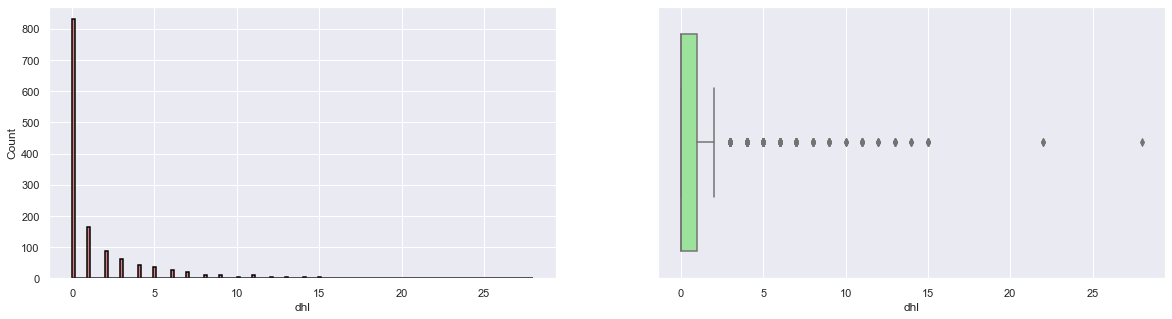

##############
dpd
##############


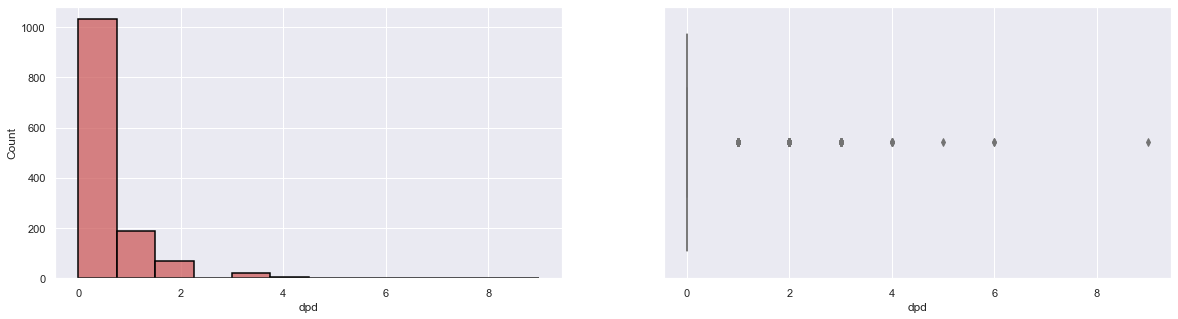

##############
inpost
##############


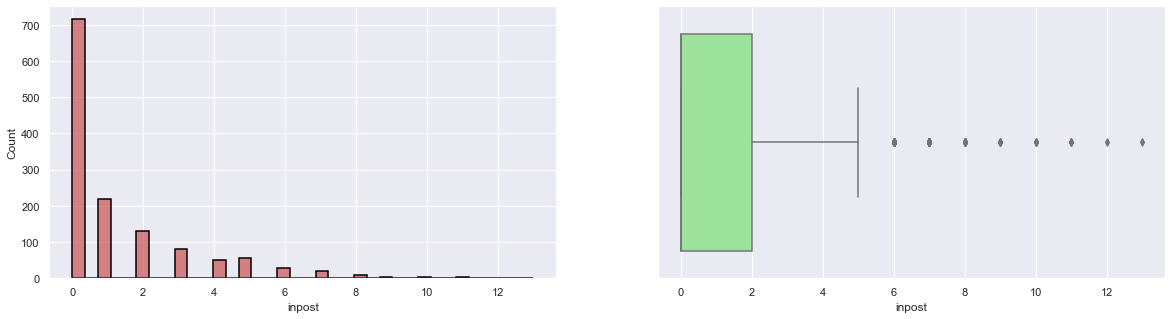

##############
poczta
##############


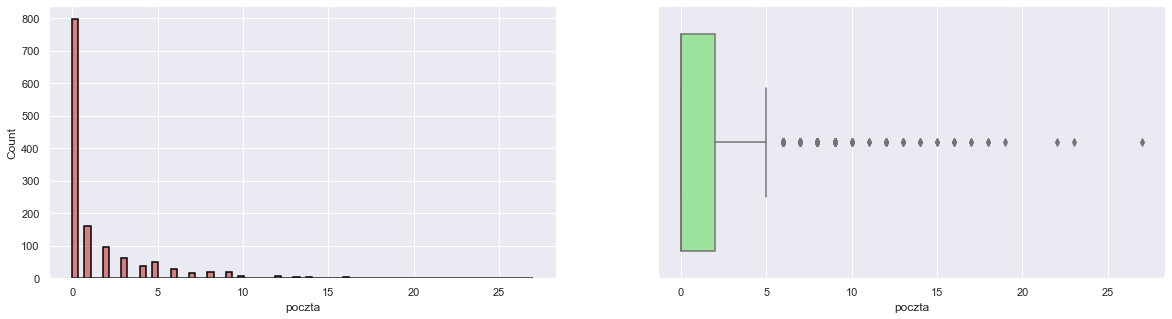

##############
ruch
##############


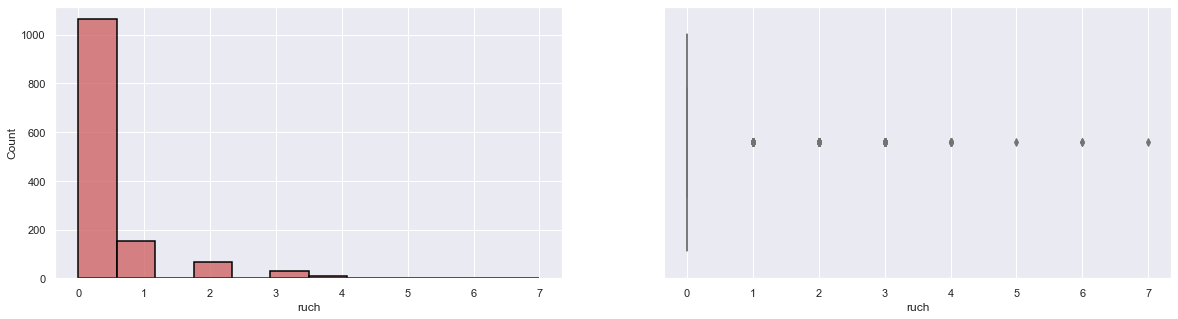

##############
ups
##############


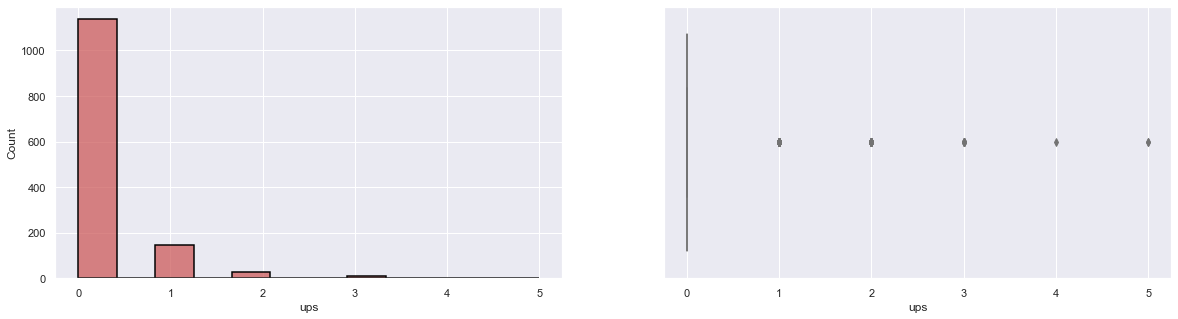

##############
tot
##############


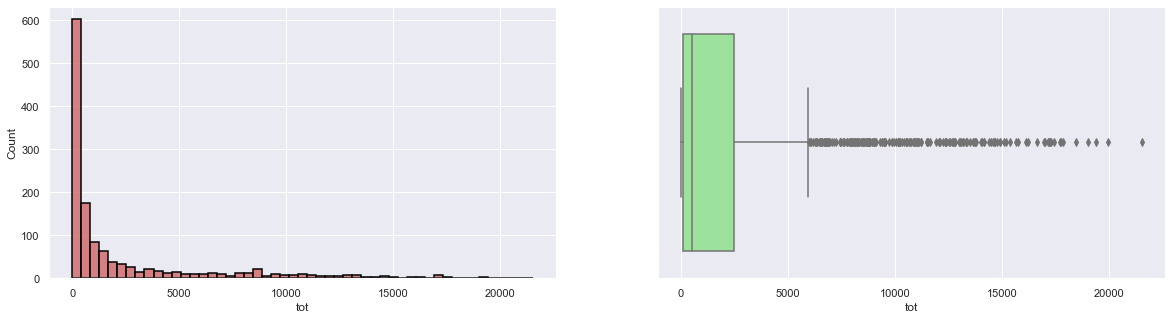

##############
tot_0_14
##############


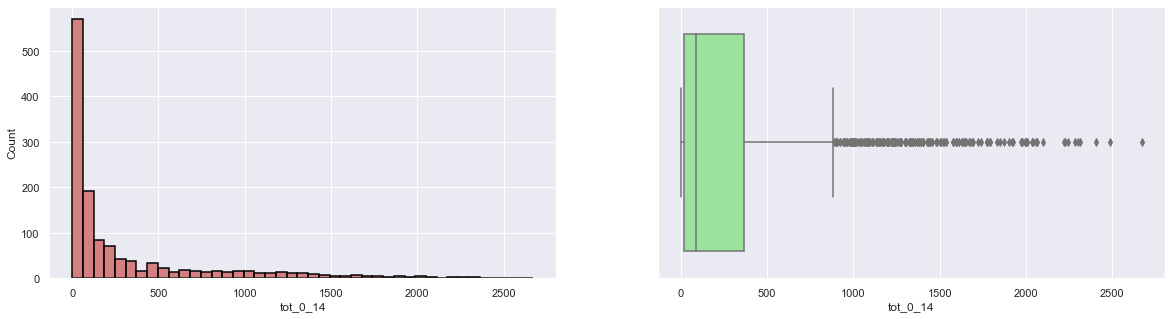

##############
tot_15_64
##############


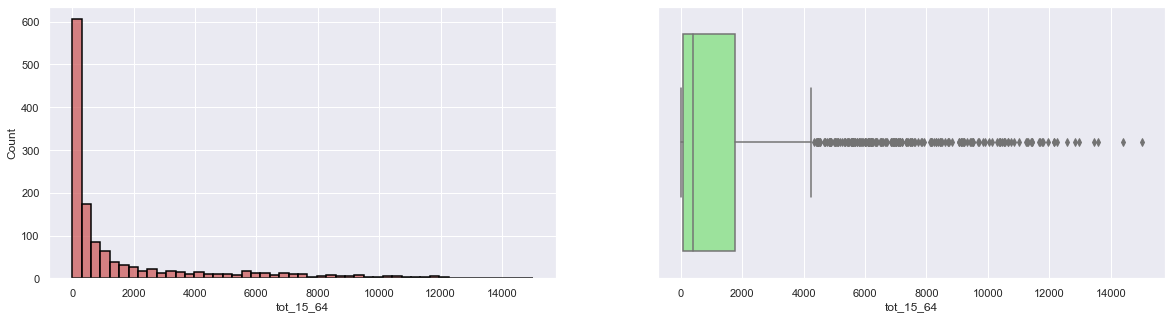

##############
tot_65__
##############


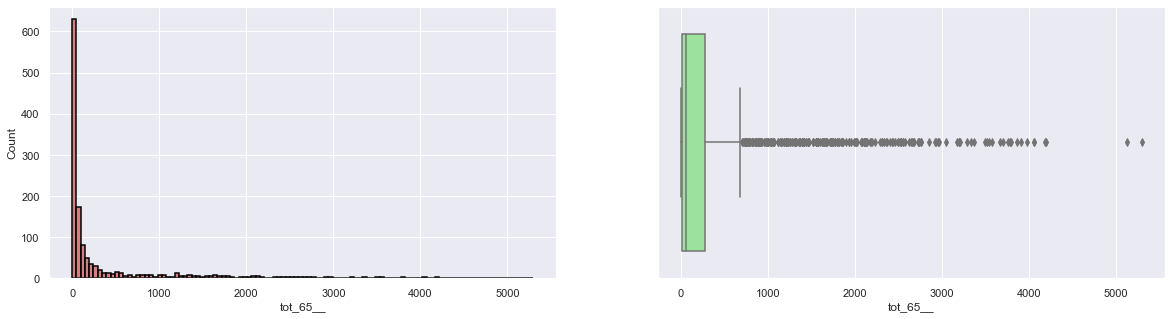

##############
tot_male
##############


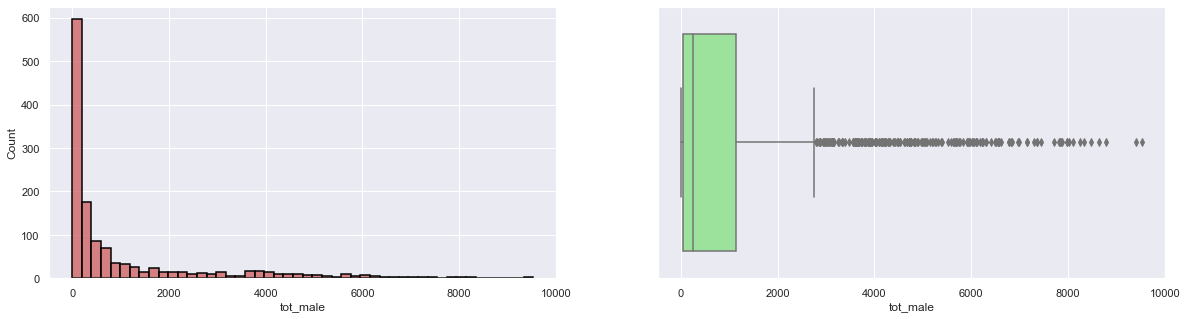

##############
tot_fem
##############


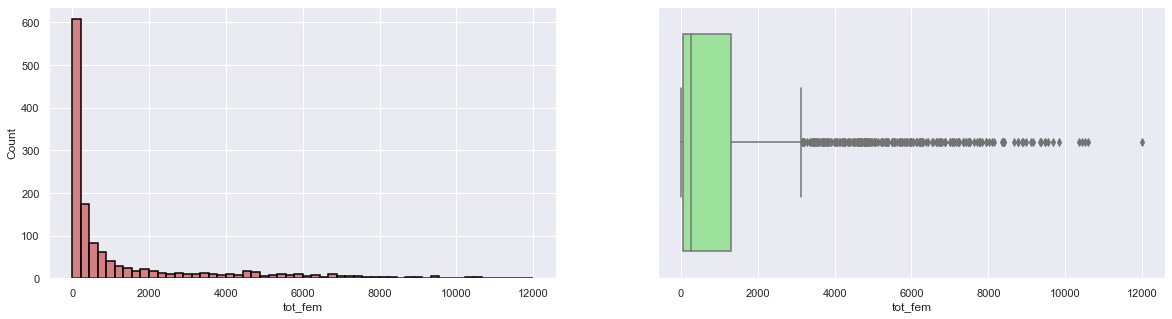

##############
male_0_14
##############


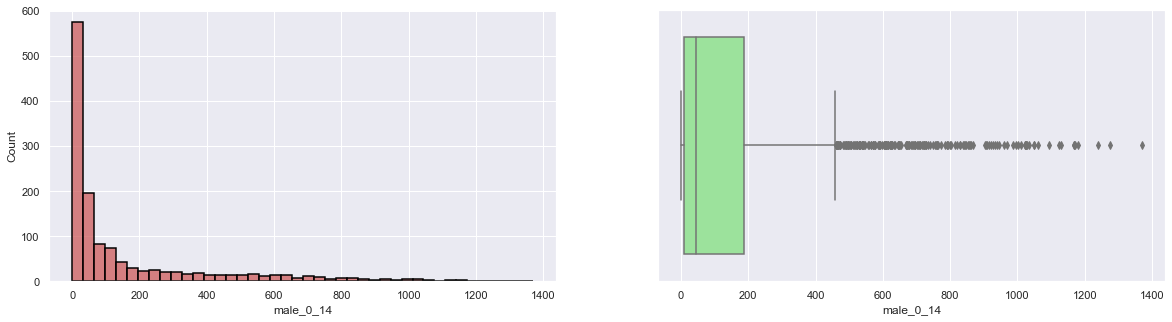

##############
male_15_64
##############


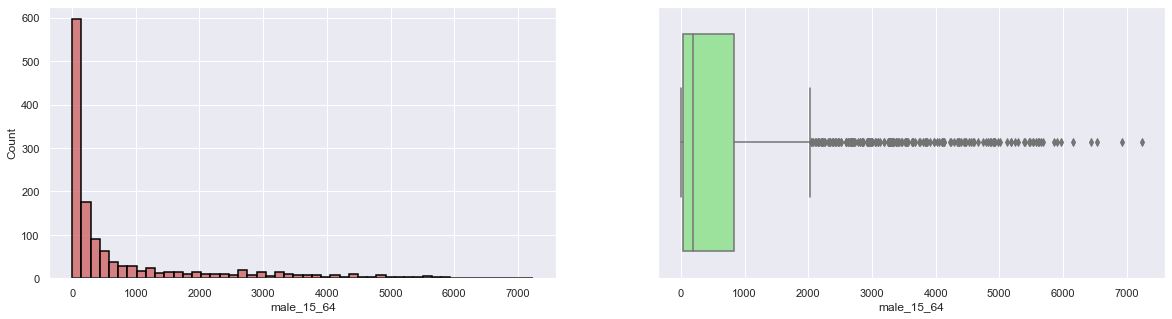

##############
male_65__
##############


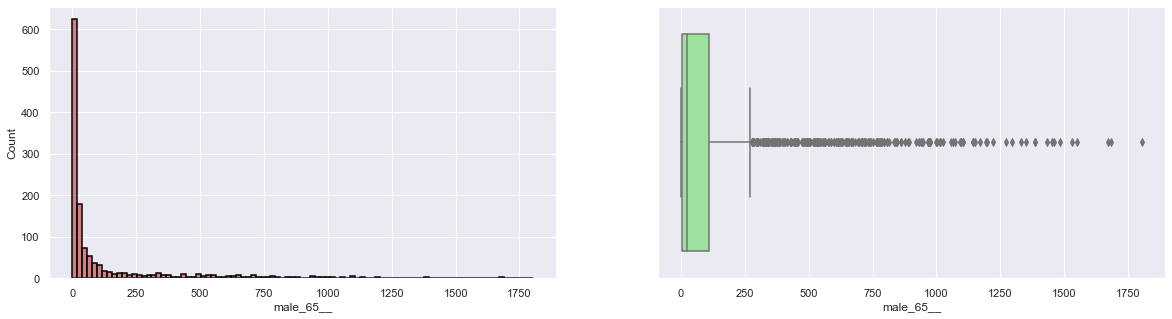

##############
fem_0_14
##############


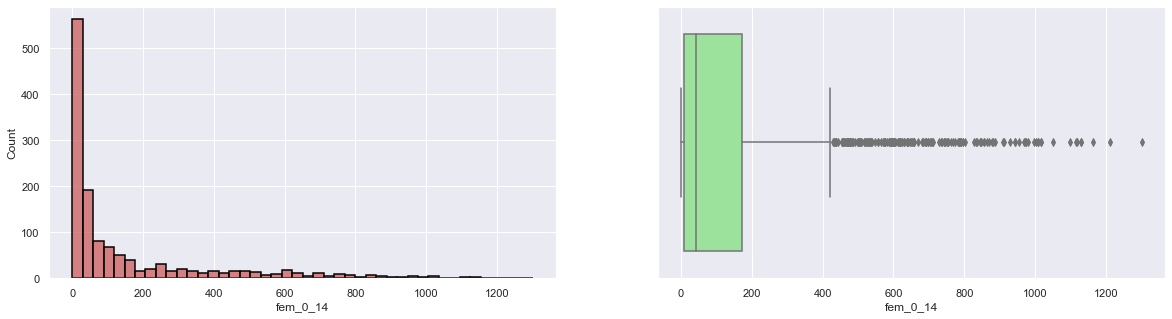

##############
fem_15_64
##############


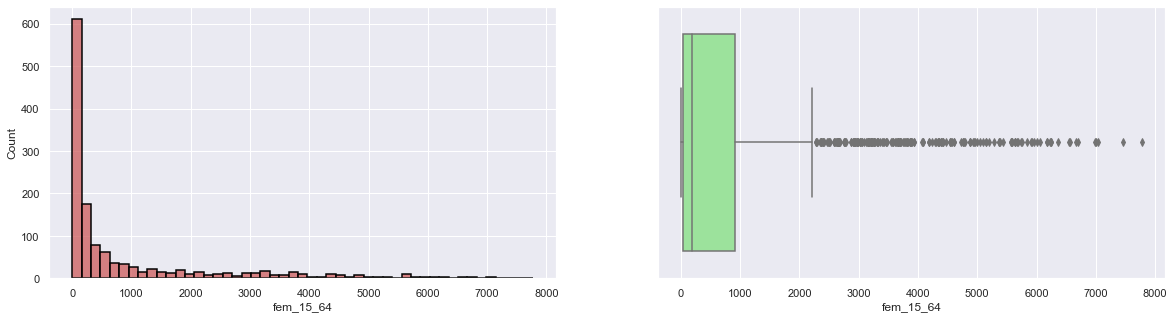

##############
fem_65__
##############


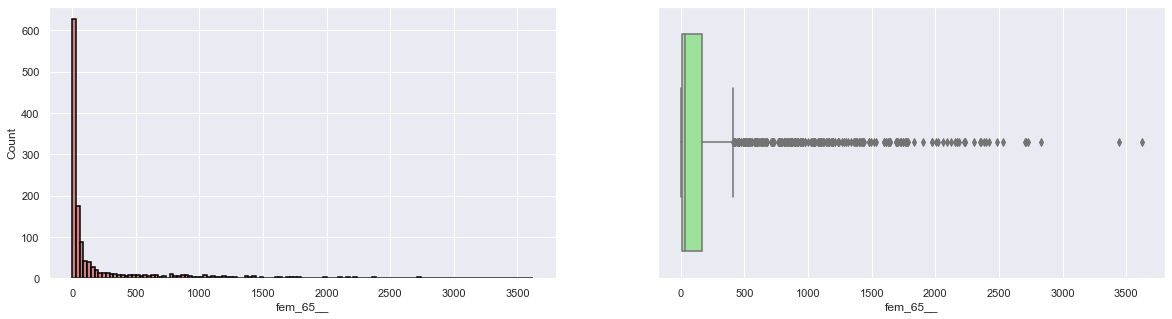

##############
fem_ratio
##############


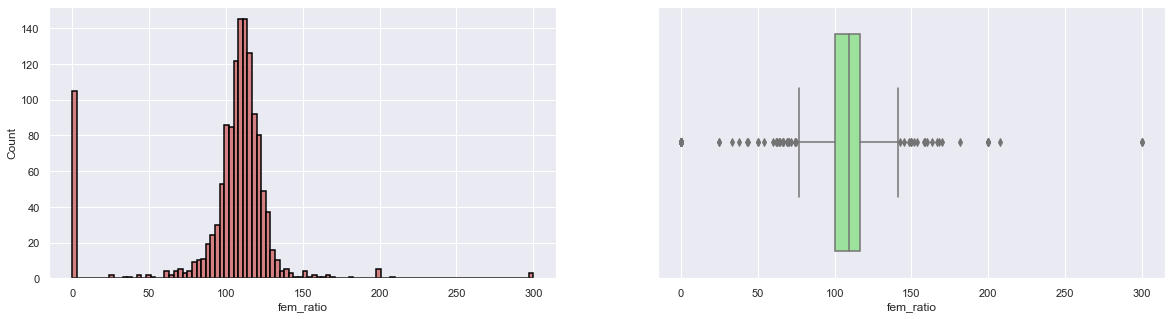

##############
buildings
##############


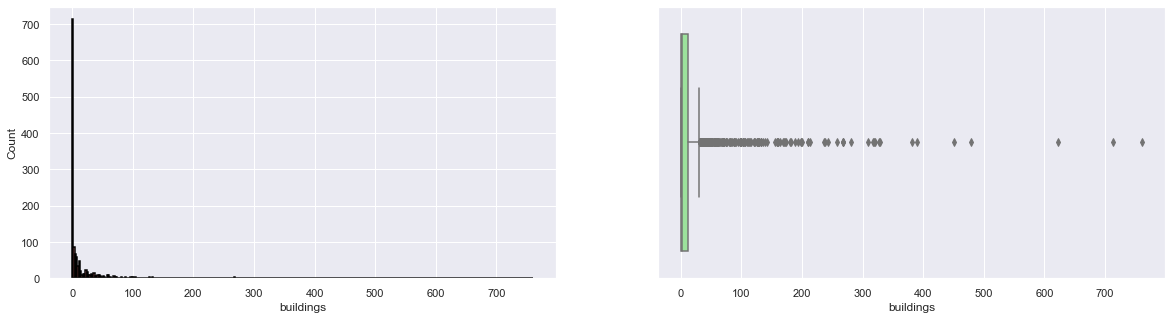

##############
shops
##############


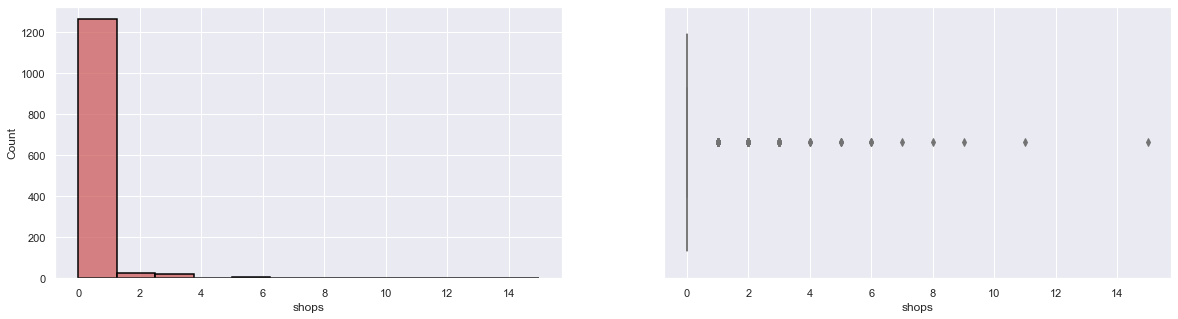

##############
parks
##############


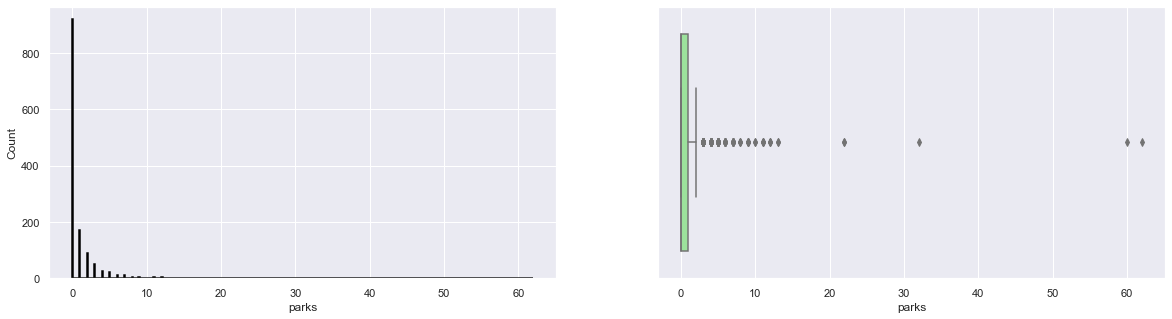

##############
forests
##############


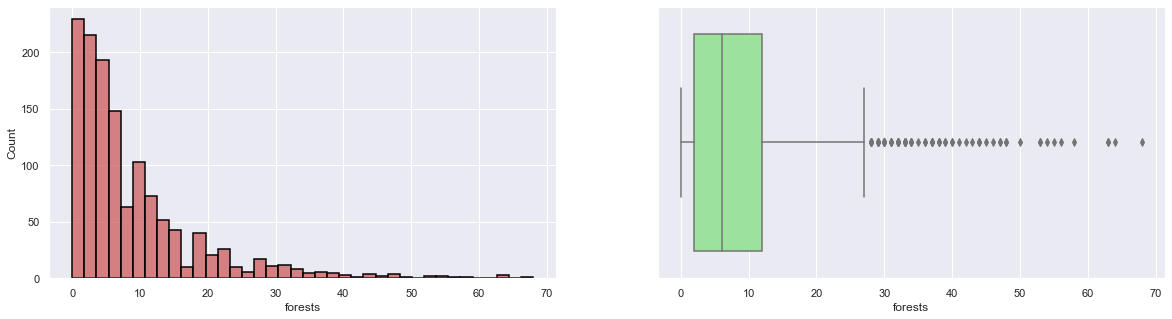

##############
schools
##############


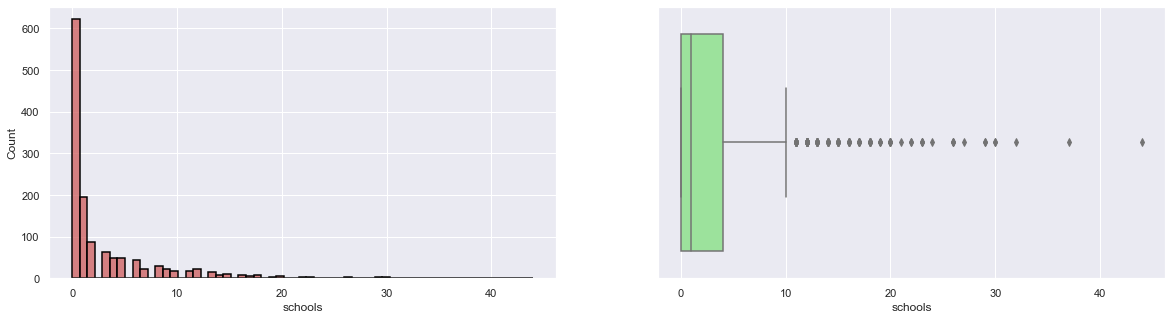

##############
railways
##############


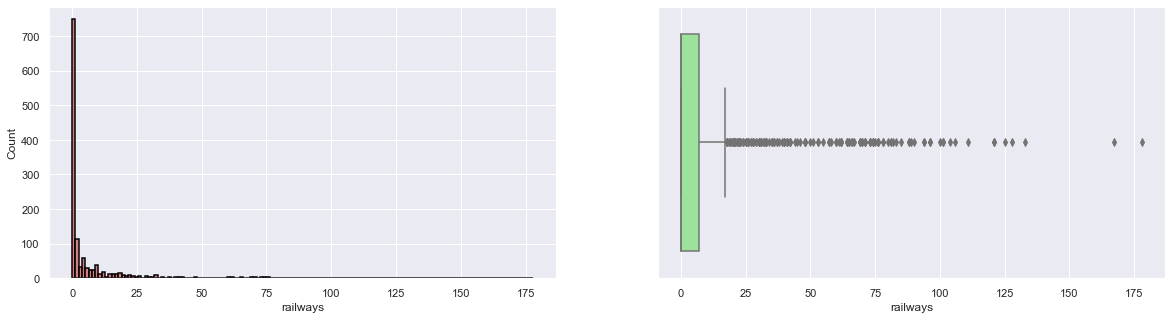

##############
cycleways
##############


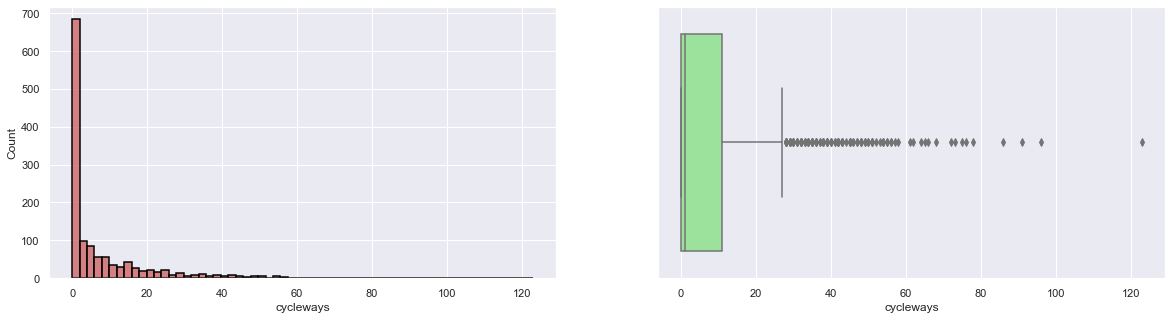

##############
parkings
##############


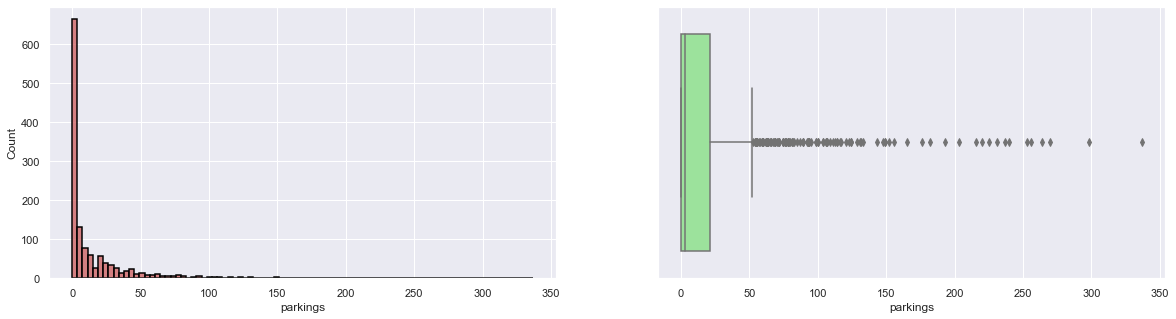

##############
crossings
##############


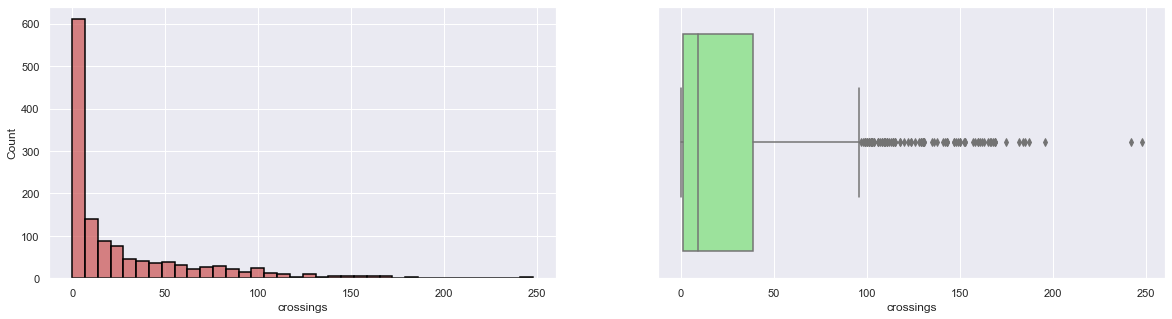

In [21]:
plt.rcParams["figure.figsize"] = (20, 5)

for i in features:
    print(f"##############\n{i}\n##############")
    
    fig, ax = plt.subplots(1,2)
    sns.histplot(x = df[i], kde=False, edgecolor= "black", color = 'indianred', linewidth= 1.5, ax=ax[0])
    sns.boxplot(x = df[i], color = 'lightgreen', ax=ax[1])
    plt.show()
    
    
#     sns.histplot(df[i], kde=False)
#     plt.plot()
#     plt.show()
#     sns.boxplot(df[i])
#     plt.plot()
#     plt.show()

### Correlation

In [11]:
# Creating a matrix using age, salry, balance as rows and columns
df[features].corr()

,dhl,dpd,inpost,poczta,ruch,ups,tot,tot_0_14,tot_15_64,tot_65__,...,fem_ratio,buildings,shops,parks,forests,schools,railways,cycleways,parkings,crossings
dhl,1.000000,0.619046,0.699638,0.939009,0.636024,0.537411,0.699248,0.668117,0.701276,0.639243,...,0.206739,0.139584,0.444369,0.343915,-0.074583,0.561940,0.301946,0.553573,0.568159,0.772155
dpd,0.619046,1.000000,0.575054,0.655815,0.573450,0.449208,0.620209,0.598663,0.620735,0.567779,...,0.173452,0.134321,0.344339,0.330304,-0.058495,0.502869,0.150831,0.364716,0.421215,0.594373
inpost,0.699638,0.575054,1.000000,0.700024,0.627307,0.524976,0.771294,0.762923,0.770340,0.700319,...,0.243415,0.178293,0.365460,0.270901,-0.076100,0.654709,0.200638,0.523073,0.571013,0.710435
poczta,0.939009,0.655815,0.700024,1.000000,0.719836,0.568991,0.768687,0.725682,0.767171,0.721797,...,0.216418,0.167669,0.435687,0.371833,-0.095133,0.604113,0.285252,0.549090,0.602133,0.796831
ruch,0.636024,0.573450,0.627307,0.719836,1.000000,0.550547,0.718894,0.663610,0.709592,0.713038,...,0.180829,0.172620,0.388775,0.381966,-0.055993,0.564673,0.132230,0.379471,0.481067,0.660451
ups,0.537411,0.449208,0.524976,0.568991,0.550547,1.000000,0.544252,0.508537,0.544616,0.509166,...,0.147835,0.101873,0.274232,0.319935,-0.036356,0.429106,0.096282,0.338054,0.345376,0.504359
tot,0.699248,0.620209,0.771294,0.768687,0.718894,0.544252,1.000000,0.962392,0.997297,0.930113,...,0.253931,0.213281,0.438120,0.368495,-0.070092,0.808090,0.168436,0.532937,0.641840,0.768806
tot_0_14,0.668117,0.598663,0.762923,0.725682,0.663610,0.508537,0.962392,1.000000,0.967492,0.820862,...,0.252999,0.221607,0.388202,0.330779,-0.059249,0.807373,0.141103,0.499685,0.632116,0.728696
tot_15_64,0.701276,0.620735,0.770340,0.767171,0.709592,0.544616,0.997297,0.967492,1.000000,0.903223,...,0.250103,0.213240,0.436175,0.361880,-0.068489,0.810377,0.168712,0.528717,0.650686,0.763605
tot_65__,0.639243,0.567779,0.700319,0.721797,0.713038,0.509166,0.930113,0.820862,0.903223,1.000000,...,0.242108,0.186161,0.431279,0.378077,-0.075472,0.716779,0.167218,0.514050,0.549641,0.733414


In [12]:
plt.rcParams["figure.figsize"] = (20, 16)

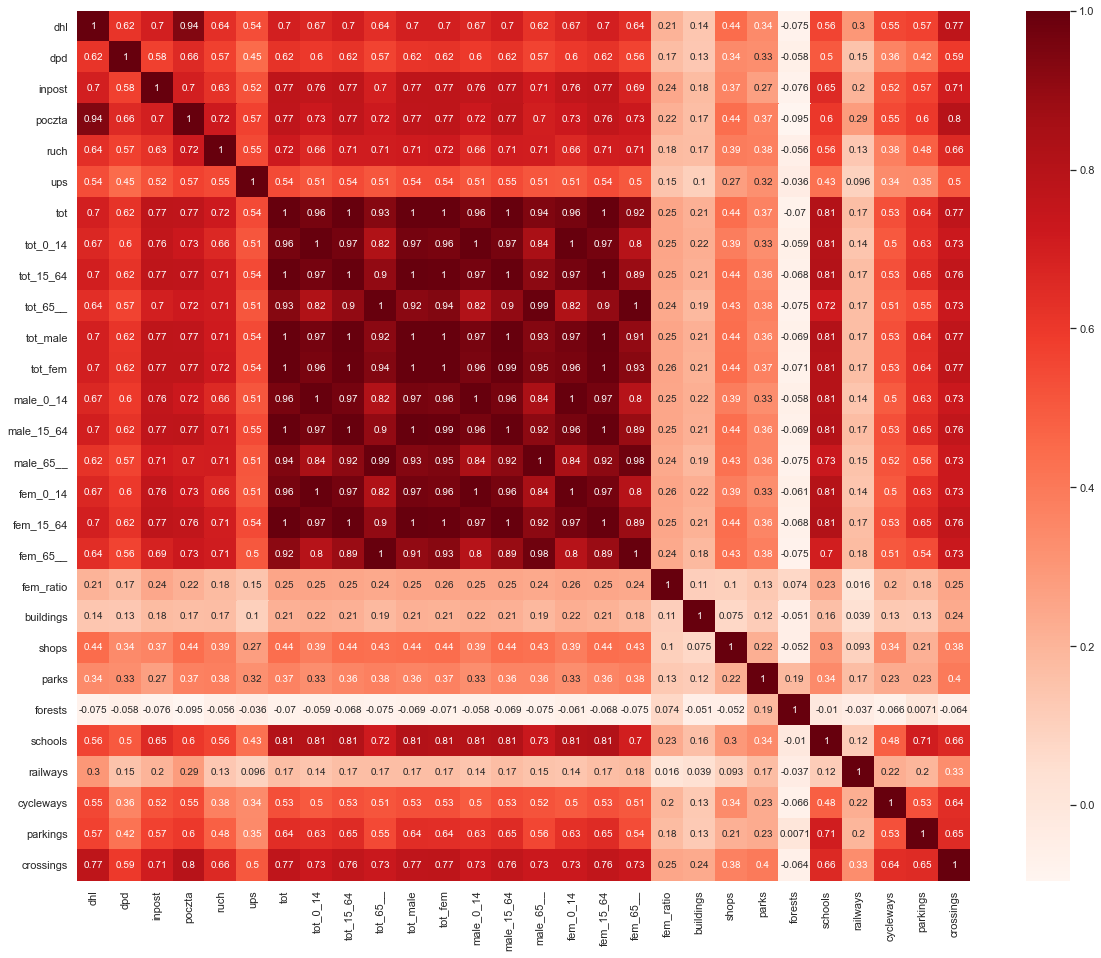

In [13]:
sns.heatmap(df[features].corr(), annot=True, cmap = 'Reds')
plt.show()

In [177]:
operators = ['dhl','dpd','inpost','poczta','ruch','ups']
demo = ['tot','tot_0_14','tot_15_64','tot_65__','tot_male','tot_fem','male_0_14','male_15_64','male_65__','fem_0_14','fem_15_64','fem_65__','fem_ratio']
points = ['buildings','shops','parks','forests','schools','railways','cycleways','parkings','crossings']

#### Correlation for operators variable

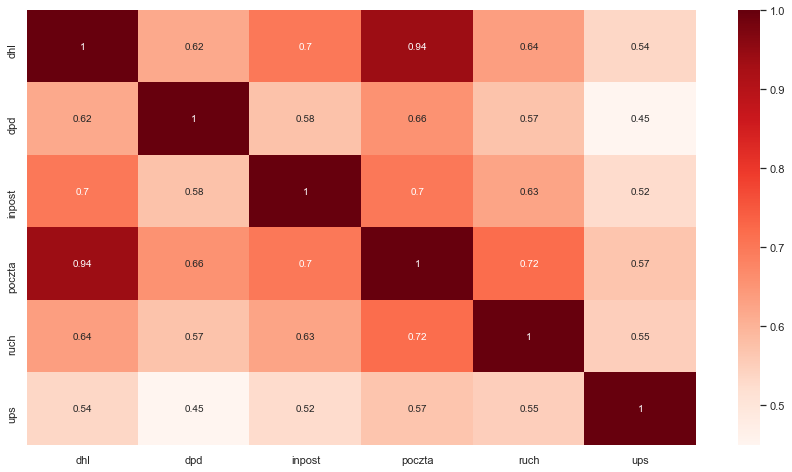

In [15]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.heatmap(df[operators].corr(), annot=True, cmap = 'Reds')
plt.show()

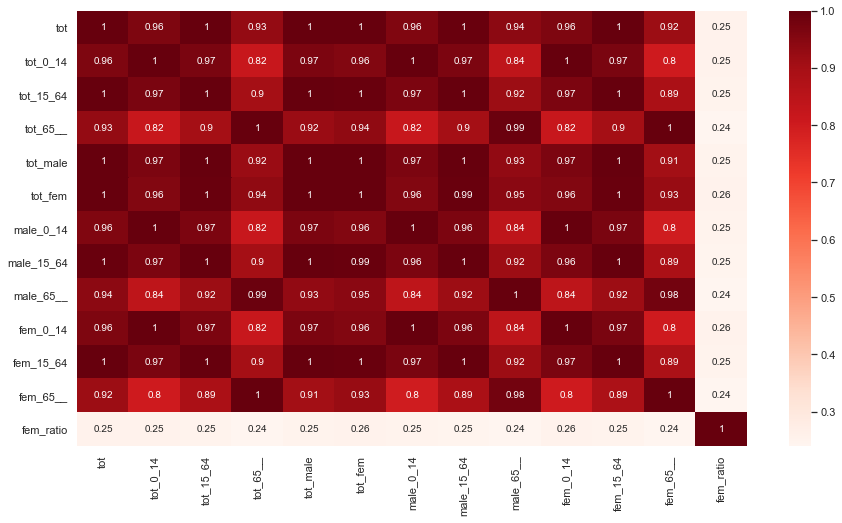

In [16]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.heatmap(df[demo].corr(), annot=True, cmap = 'Reds')
plt.show()

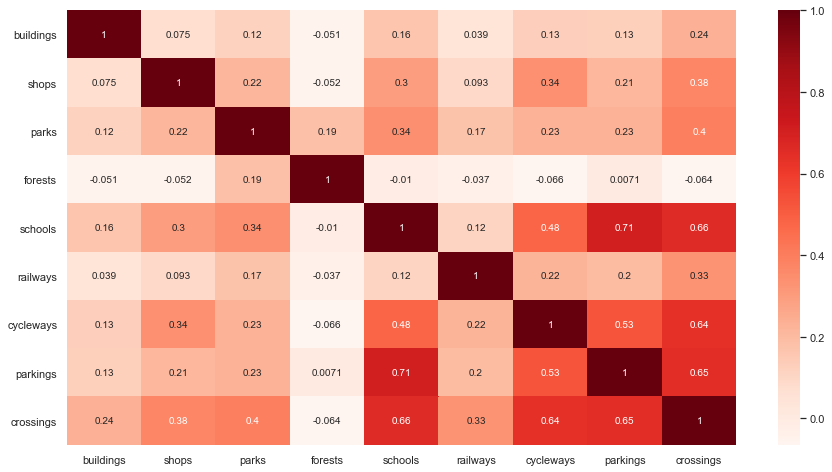

In [17]:
plt.rcParams["figure.figsize"] = (15, 8)
sns.heatmap(df[points].corr(), annot=True, cmap = 'Reds')
plt.show()

In [22]:
# plt.rcParams["figure.figsize"] = (15, 8)
# sns.heatmap(df[['male_65__', 'fem_ratio']].corr(), annot=True, cmap = 'Reds')
# plt.show()

In [117]:
def visualisation(x):
    plt.figure(figsize=(10, 5))
    sns.histplot(x = x, kde=False, edgecolor= "black", color = 'indianred', linewidth= 1.5)
    plt.plot()

In [118]:
df['buildings'].value_counts().iloc[0] > df.shape[0]*0.33 #.index.tolist()

True

In [119]:
type(df['buildings'].value_counts().index[4])

numpy.float64

In [121]:
type(df['grid_index'])

pandas.core.series.Series

In [77]:
df['buildings'] = df['buildings'].astype(int)

In [122]:
df.head()

,grid_index,dhl,dpd,inpost,poczta,ruch,ups,tot,tot_0_14,tot_15_64,...,fem_ratio,buildings,shops,parks,forests,schools,railways,cycleways,parkings,crossings
0,206436,0.0,0.0,0.0,1.0,0.0,1.0,4841,696,3586,...,106.968790,4.0,0.0,1.0,2.0,4.0,2.0,8.0,11.0,19.0
1,206464,0.0,0.0,0.0,0.0,0.0,0.0,137,19,98,...,124.590164,3.0,0.0,0.0,7.0,1.0,0.0,0.0,1.0,1.0
2,206476,0.0,0.0,0.0,0.0,0.0,0.0,269,38,199,...,116.935484,14.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0,4.0
3,206492,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.000000,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
4,206505,0.0,0.0,0.0,1.0,0.0,0.0,386,63,276,...,114.444444,0.0,0.0,0.0,8.0,0.0,0.0,4.0,3.0,1.0


In [181]:
def visualisation_binary(df, var):
    new_name = var + '_binary'
    if(df[var].value_counts().iloc[0] > int(df.shape[0]*0.33)):
        print('\nnew variable: "' + new_name + '"')
        pyk = df[var].value_counts().index[0]
#         df[new_name] = df.apply(lambda x: np.where(x[var] == pyk, 'few_'+var, 'more_'+var), axis = 1)
        df[new_name] = df[var].apply(lambda x: 'few_'+var if x == 0  else 'more_'+var)
        plt.figure(figsize=(10, 5))
#         sns.histplot(x = df[new_name], bins = 2, kde=False, edgecolor= "lightblue", color = 'indianred', linewidth= 1.5)
        df[new_name].value_counts().plot(kind='bar')
        plt.plot()
        plt.show()
    else: print(f'\nno binary transformation for variable "{var}"')


new variable: "buildings_binary"


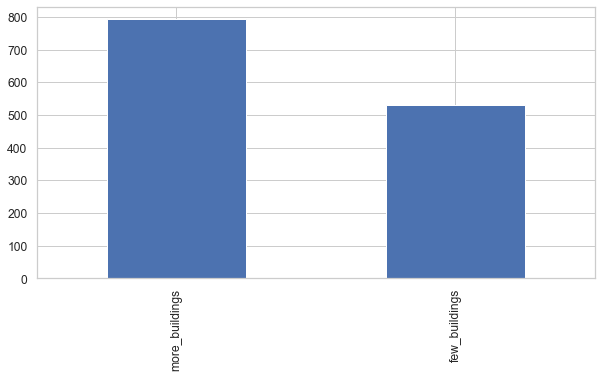


new variable: "shops_binary"


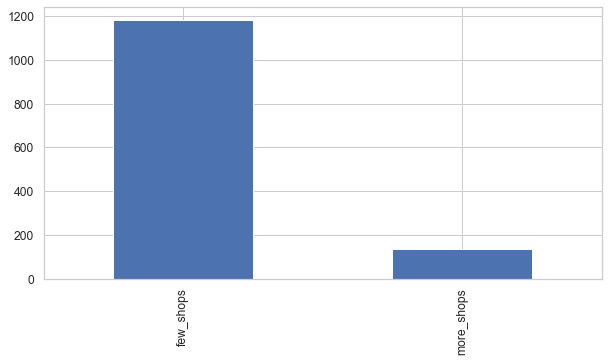


new variable: "parks_binary"


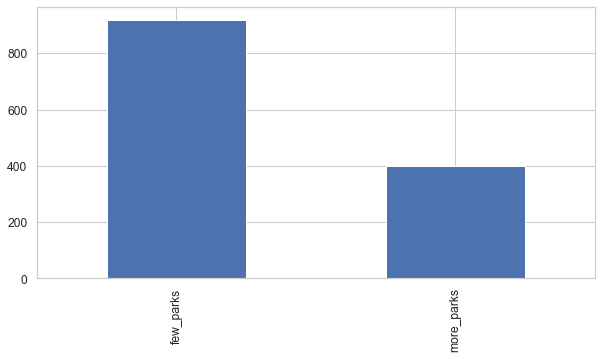


no binary transformation for variable "forests"

new variable: "schools_binary"


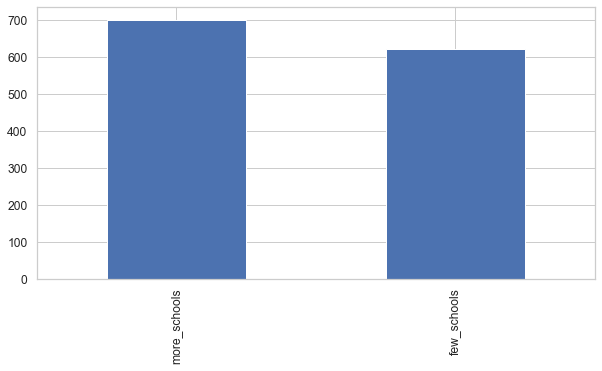


new variable: "railways_binary"


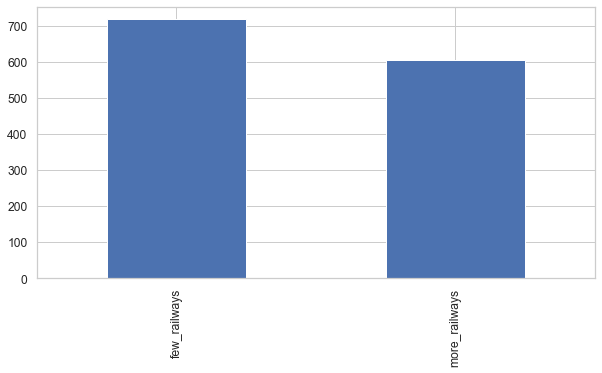


new variable: "cycleways_binary"


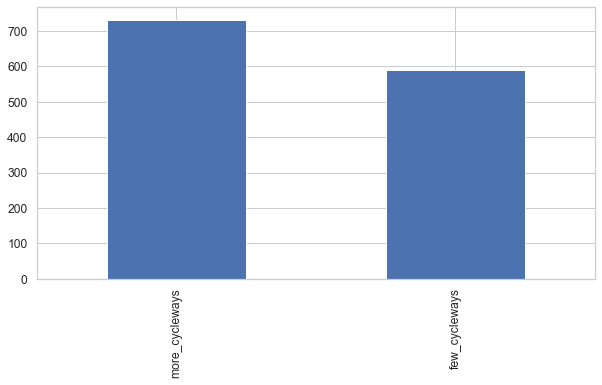


no binary transformation for variable "parkings"

no binary transformation for variable "crossings"


In [207]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 5]})
for point in points:
    visualisation_binary(df, point)

In [202]:
def visualisation_log(df, var):
    new_name = var + 'log'

    df[new_name] = np.log(1+df[var])

    fig, ax = plt.subplots(1,2)
    sns.histplot(x = df[var], kde=False, edgecolor= "black", color = 'indianred', linewidth= 1.5, ax=ax[0]).set_title(f"{var}", fontsize=20)
    sns.histplot(x = df[new_name], kde=False, edgecolor= "black", color = 'lightgreen', linewidth= 1.5, ax=ax[1]).set_title(f"Logarithm of {var}", fontsize=20)
    plt.plot()
    plt.show()

In [203]:
demo_logarithms = ['tot','tot_0_14','tot_15_64','tot_65__','tot_male','tot_fem','male_0_14','male_15_64','male_65__','fem_0_14','fem_15_64','fem_65__']

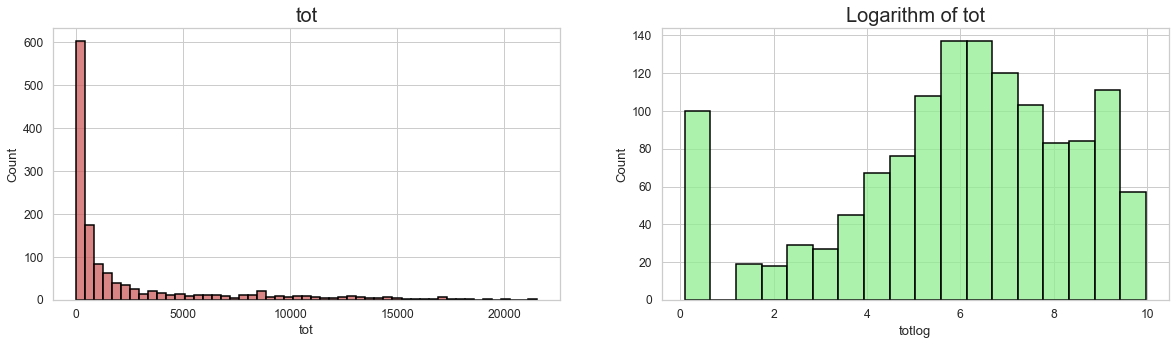

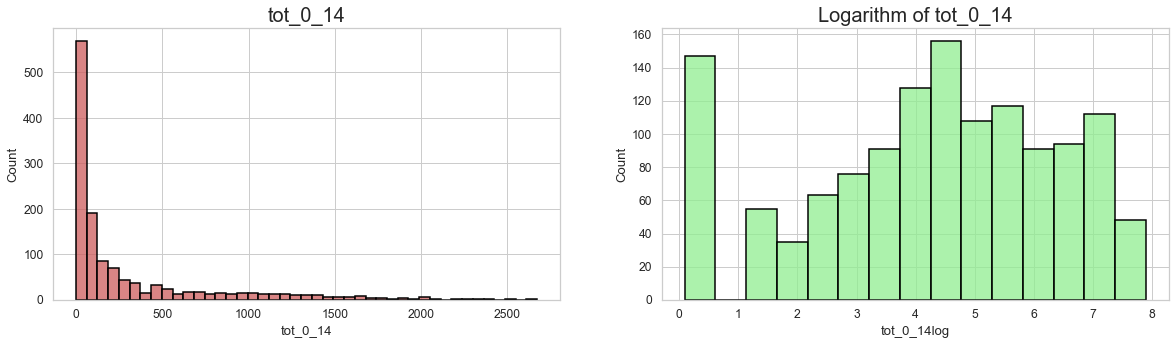

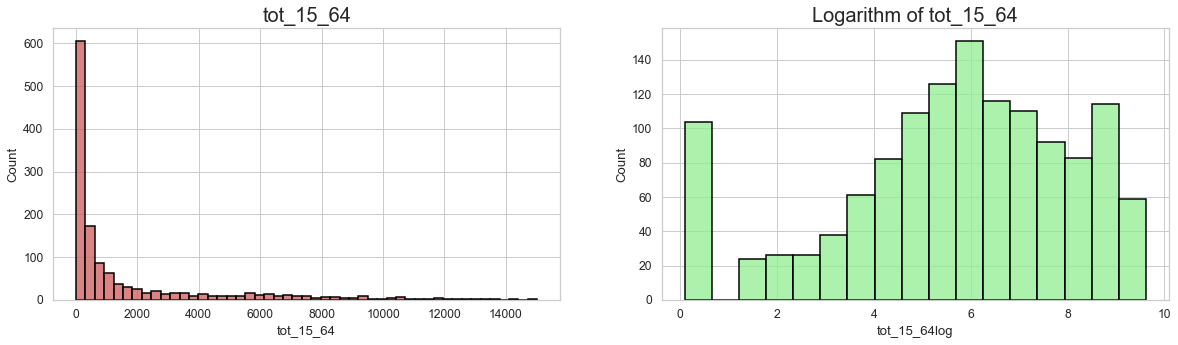

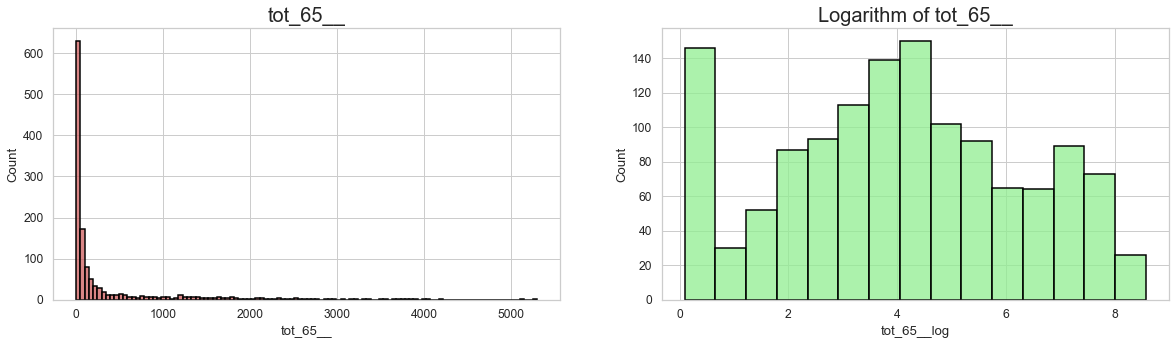

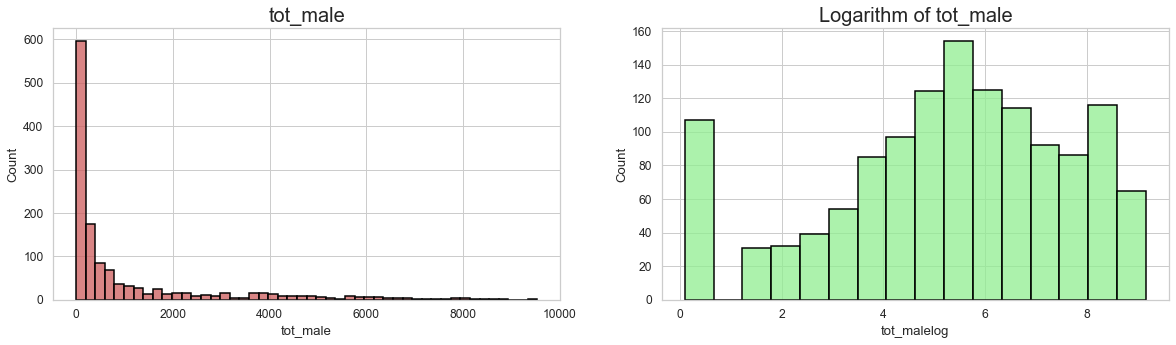

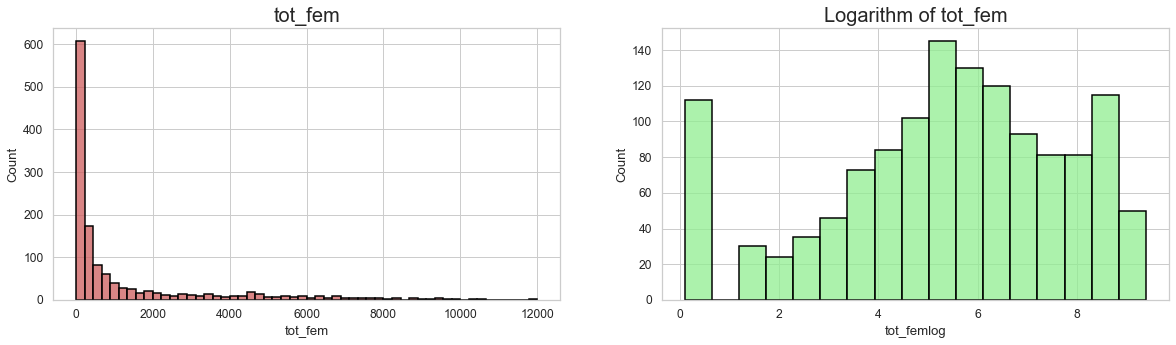

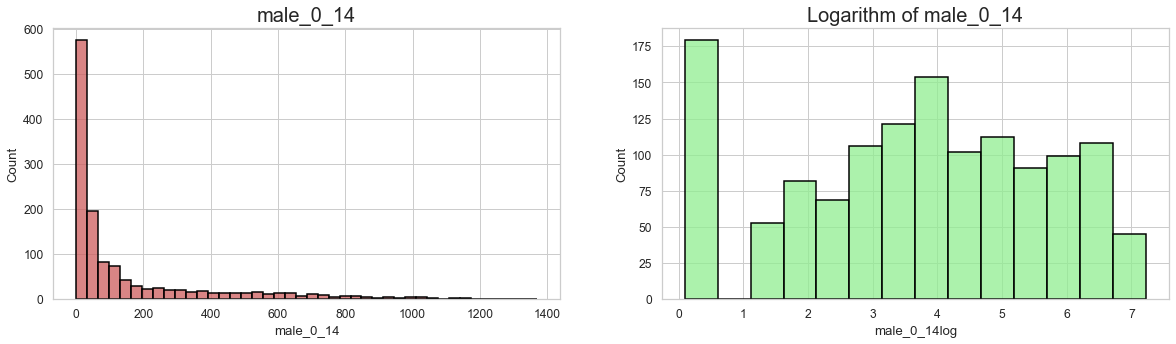

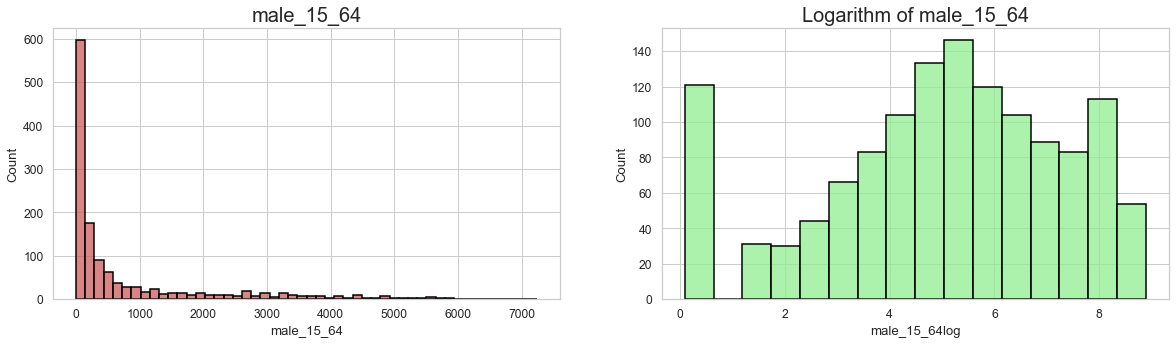

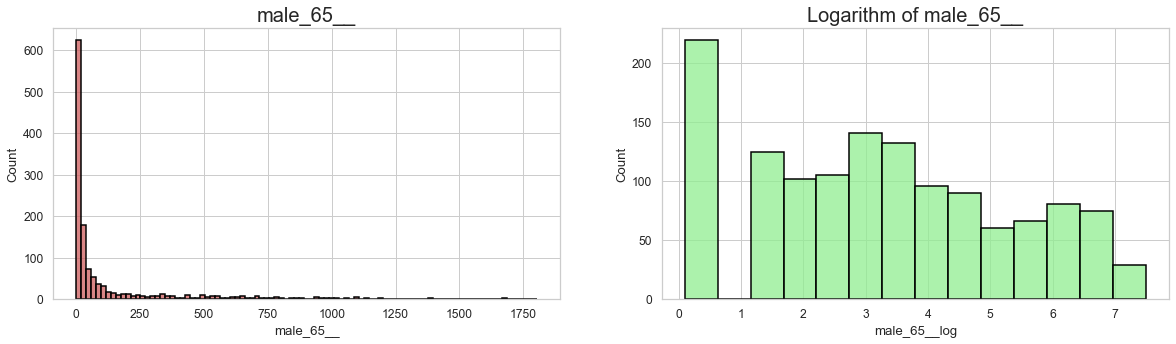

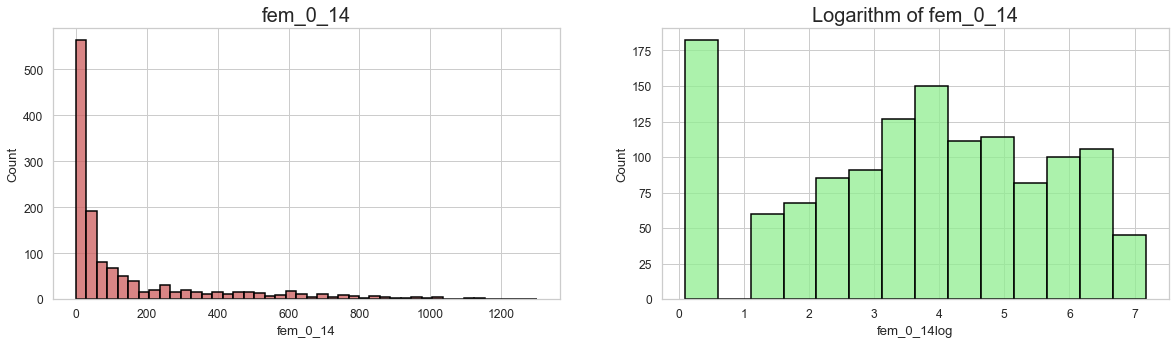

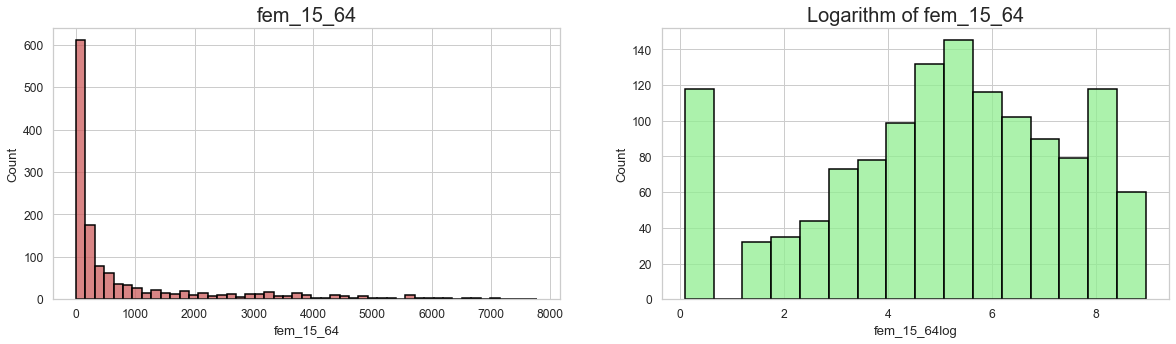

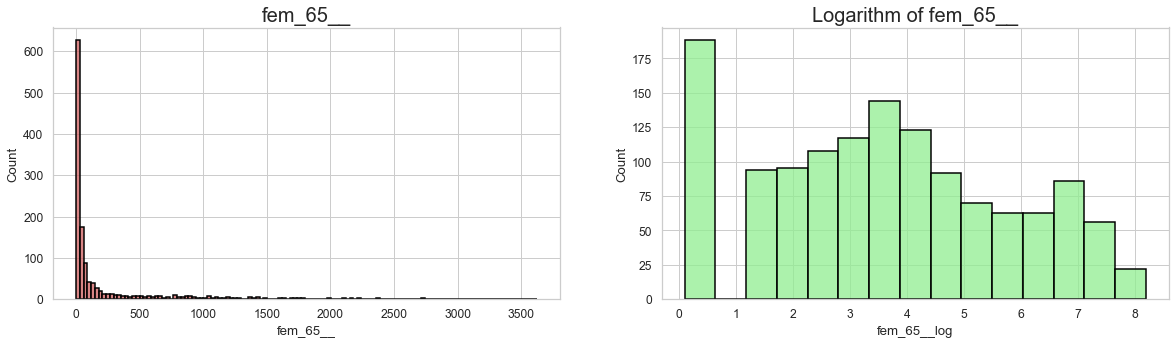

In [208]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 5]})
for point in demo_logarithms:
    visualisation_log(df, point)

In [209]:
df.columns.to_list()

['grid_index',
 'dhl',
 'dpd',
 'inpost',
 'poczta',
 'ruch',
 'ups',
 'tot',
 'tot_0_14',
 'tot_15_64',
 'tot_65__',
 'tot_male',
 'tot_fem',
 'male_0_14',
 'male_15_64',
 'male_65__',
 'fem_0_14',
 'fem_15_64',
 'fem_65__',
 'fem_ratio',
 'buildings',
 'shops',
 'parks',
 'forests',
 'schools',
 'railways',
 'cycleways',
 'parkings',
 'crossings',
 'railways_binary',
 'buildings_binary',
 'inpost_binary',
 'xx',
 'shops_binary',
 'parks_binary',
 'schools_binary',
 'cycleways_binary',
 'totlog',
 'tot_0_14log',
 'tot_15_64log',
 'tot_65__log',
 'tot_malelog',
 'tot_femlog',
 'male_0_14log',
 'male_15_64log',
 'male_65__log',
 'fem_0_14log',
 'fem_15_64log',
 'fem_65__log']

In [210]:
df_warszawa = pd.read_csv("../datasets/preprocessed_data/df_warszawa_gwr.csv")
df_krakow = pd.read_csv("../datasets/preprocessed_data/df_krakow_gwr.csv")
df_poznan = pd.read_csv("../datasets/preprocessed_data/df_poznan_gwr.csv")
df_gwr = pd.concat([df_warszawa, df_krakow, df_poznan])
df_gwr = df_gwr.reset_index()
df_gwr = df_gwr.drop(columns = {'index'})

In [213]:
demo_logarithms_gwr = ['TOT','TOT_0_14','TOT_15_64','TOT_65__','TOT_MALE','TOT_FEM','MALE_0_14','MALE_15_64','MALE_65__','FEM_0_14','FEM_15_64','FEM_65__']


no binary transformation for variable "buildings"

new variable: "shops_binary"


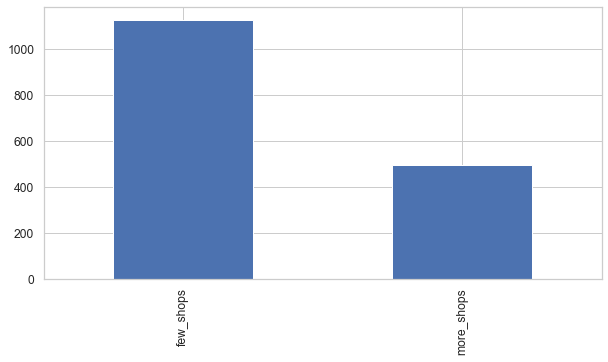


new variable: "parks_binary"


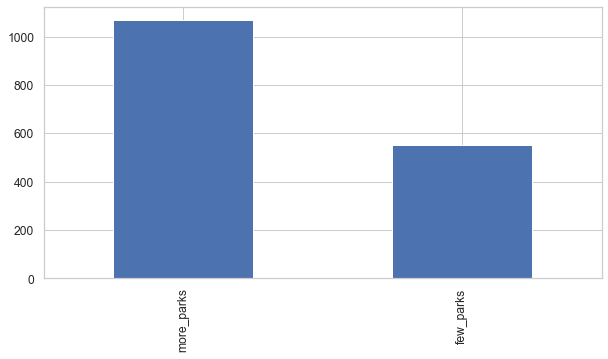


no binary transformation for variable "forests"

no binary transformation for variable "schools"

no binary transformation for variable "railways"

no binary transformation for variable "cycleways"

no binary transformation for variable "parkings"

no binary transformation for variable "crossings"


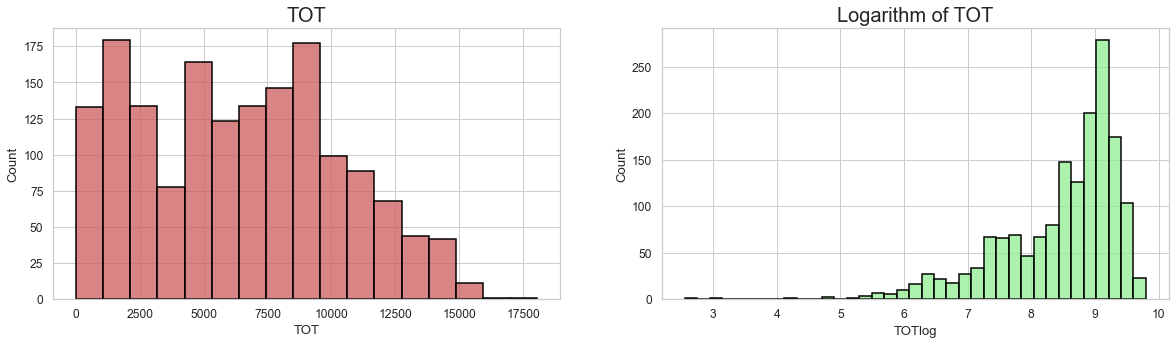

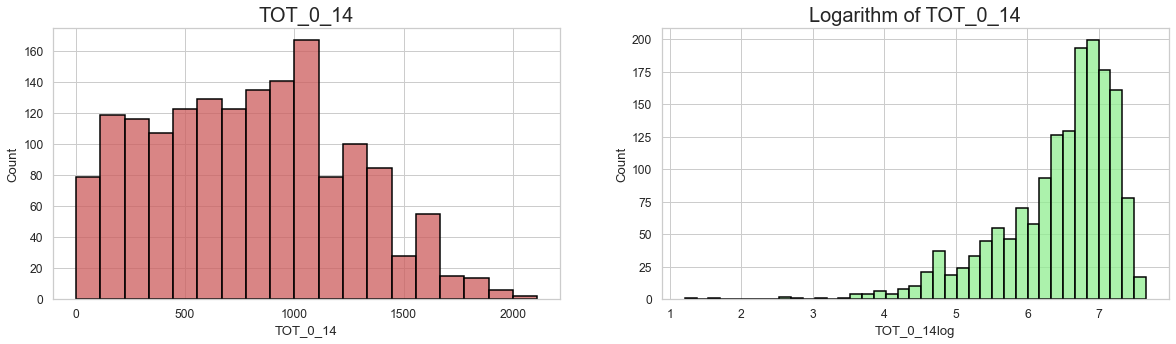

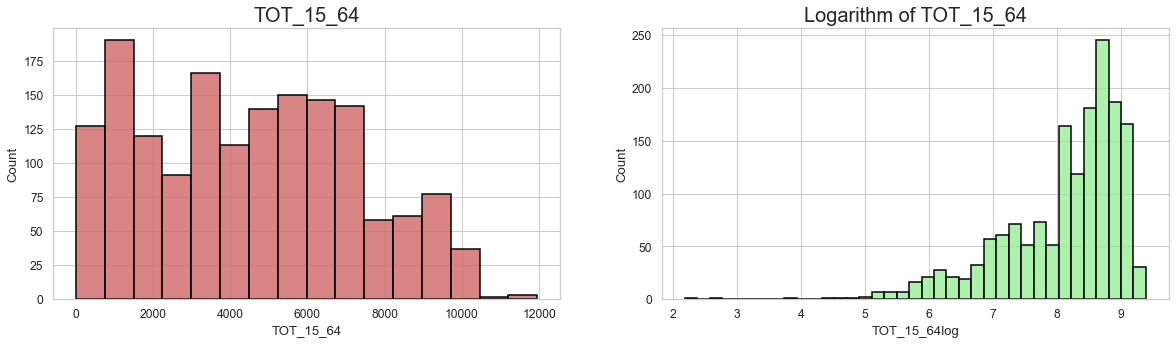

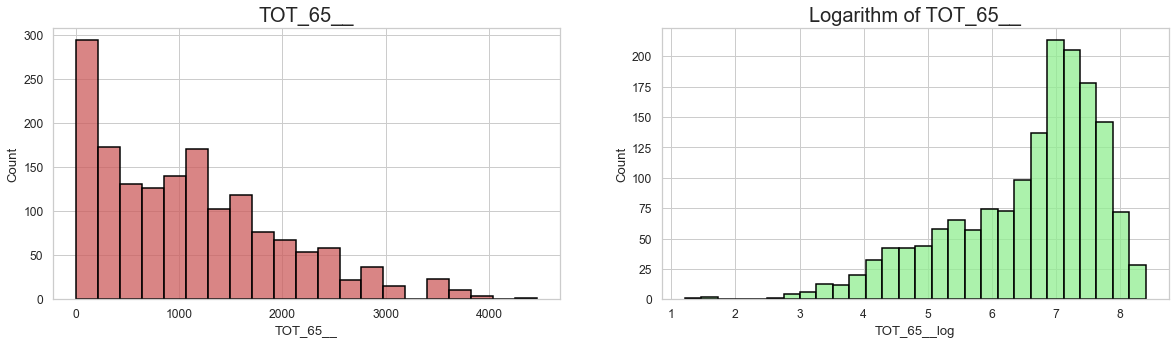

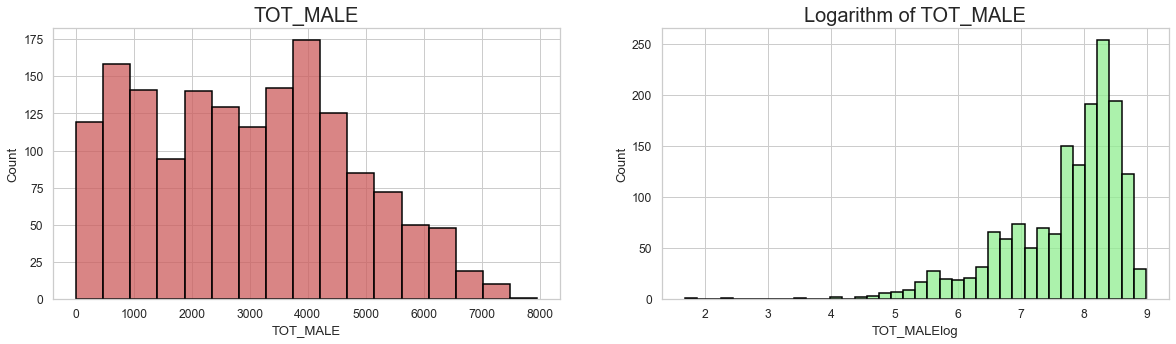

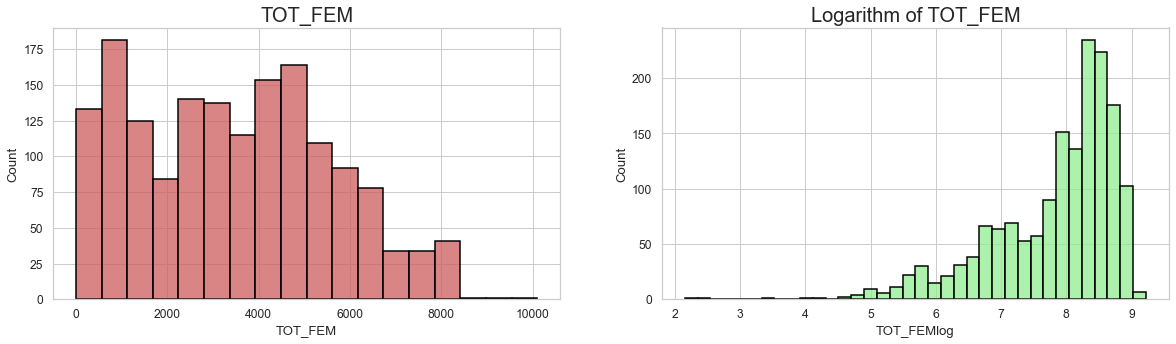

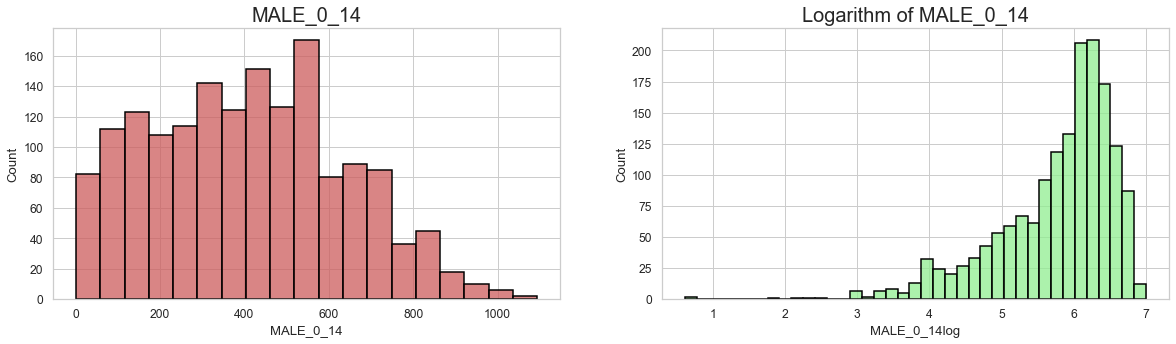

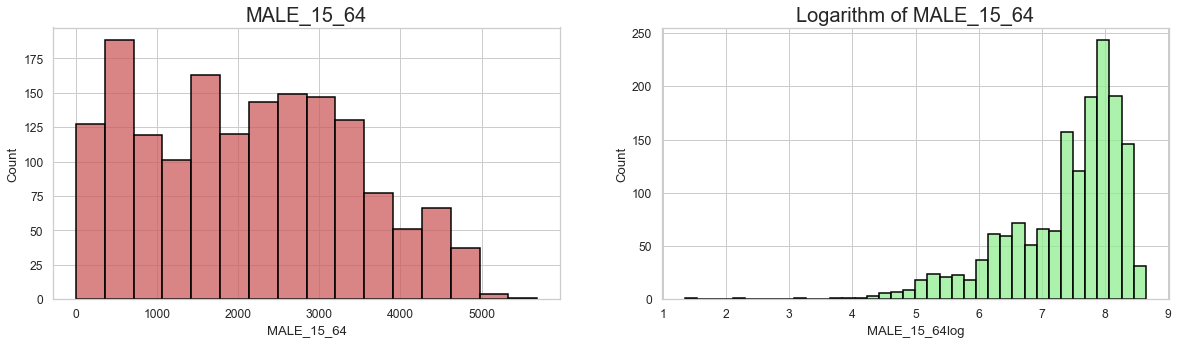

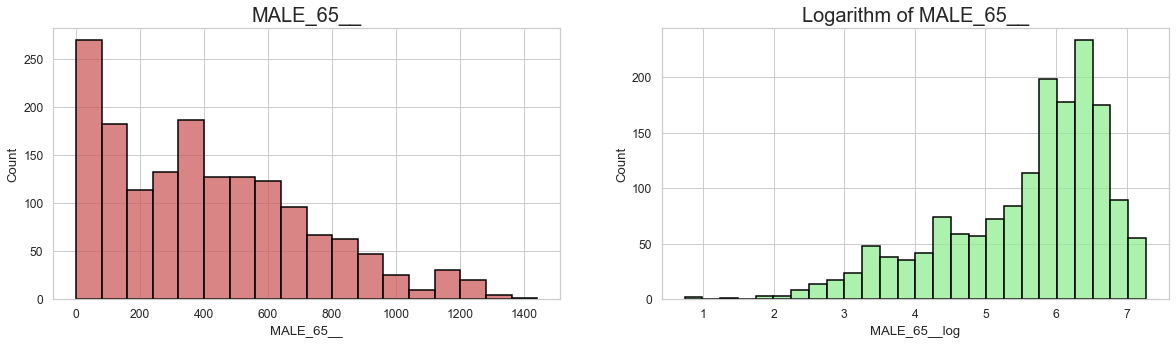

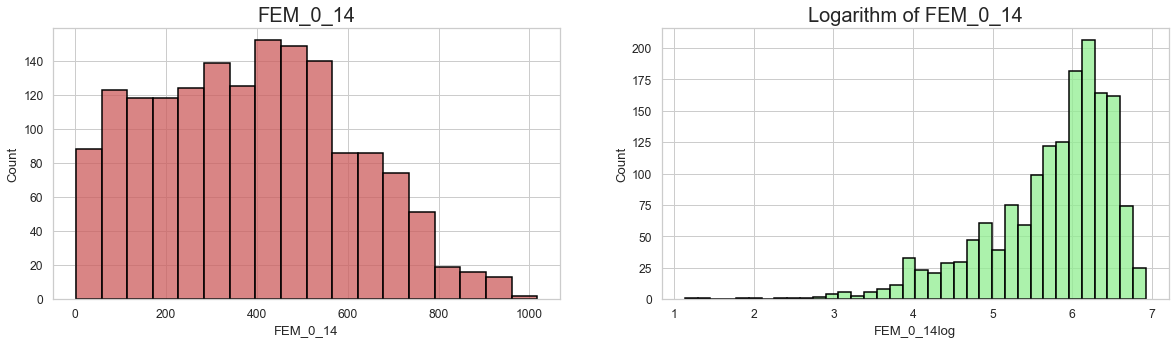

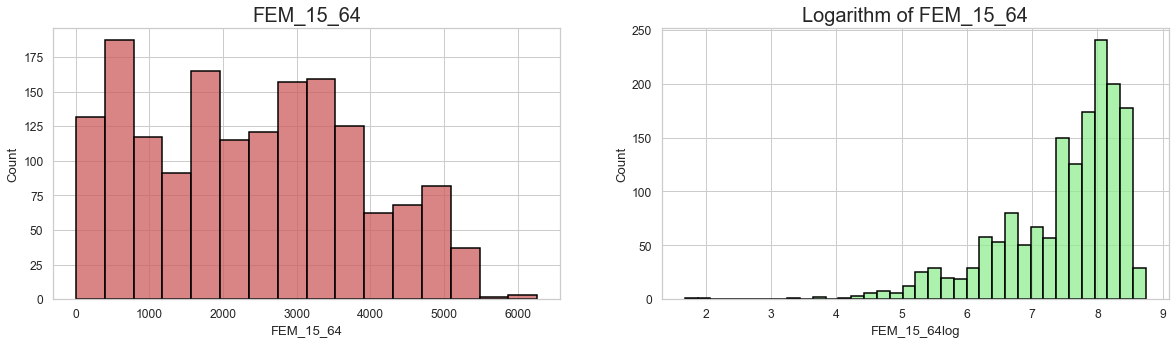

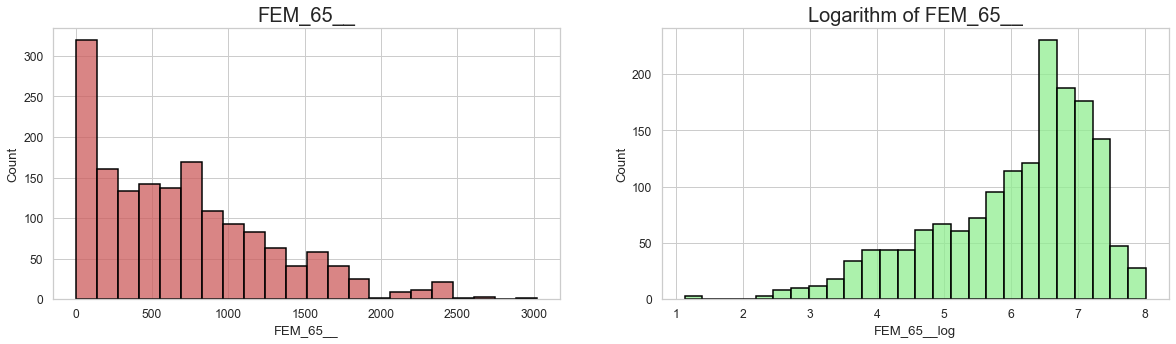

In [214]:
for point in points:
    visualisation_binary(df_gwr, point)
for point in demo_logarithms_gwr:
    visualisation_log(df_gwr, point)

In [215]:
df_gwr.to_csv("../datasets/preprocessed_data/df_gwr_after_transform.csv", index=False)